In [1]:
import pandas as pd
df = pd.read_csv('1y apple.csv')
type(df)

pandas.core.frame.DataFrame

In [2]:
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df['Date']=pd.to_datetime(df['Date'], format='%m/%d/%Y')
#conversion en date pour la colone date

In [4]:
df.set_index('Date', inplace=True)

In [5]:
#on met toutes les données en float
for k in df: 
    if df[k].dtype == 'O':
        df[k]=df[k].str.replace('$','').astype(float)


In [6]:
df.columns

Index(['Close/Last', 'Volume', 'Open', 'High', 'Low'], dtype='object')

In [7]:
#données par mois
df.resample('m').sum()

Close/Last      Volume       Open       High        Low
Date                                                               
2018-10-31     54.7150   152067240    54.2200    55.1125    54.1550
2018-11-30   1003.9875  3808828080  1007.0525  1018.2337   990.6775
2018-12-31    780.2650  3557153840   784.9050   794.7700   768.9825
2019-01-31    809.3725  3282131400   806.4450   816.5350   797.7252
2019-02-28    815.7075  1882423520   814.1125   821.1867   810.0266
...                ...         ...        ...        ...        ...
2023-06-30   3869.9500  1297863400  3857.2500  3894.1960  3834.9257
2023-07-31   3848.2300   996257010  3850.1250  3878.5359  3824.3700
2023-08-31   4164.9250  1323817310  4172.5440  4203.7494  4132.5307
2023-09-30   3540.0500  1337873850  3551.7250  3579.9180  3511.6610
2023-10-31   3671.9400  1127999790  3659.2200  3699.0475  3634.7600

[61 rows x 5 columns]

In [8]:
dfnew=df.drop('Volume', axis=1)#on enlève volume qui n'a pas le même ordre de grandeur

<Axes: xlabel='Date'>

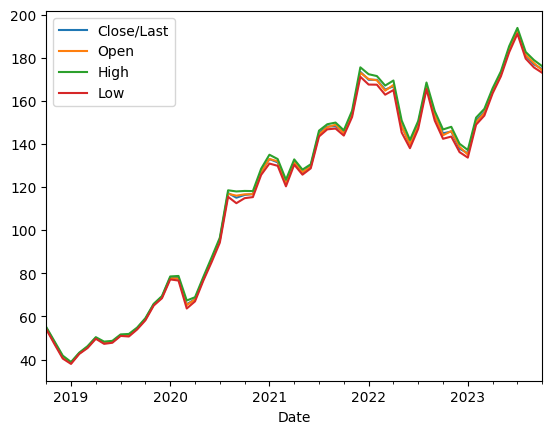

In [9]:
dfnew.resample('1m').mean().plot() #on affiche les données par mois

In [10]:
# petit code pour selectionner une durée 

#df.reset_index(inplace=True)
#defnew2=df[(df['Date'].dt.year >2020) & (df['Date'].dt.year < 2022)]
#defnew2.set_index('Date', inplace=True)
#defnew2.resample('1m').mean().plot()

In [11]:
#nouvelle data frame pour calculer les variations journalières

dh=dfnew.reset_index()
L=[]
for column in dfnew:
    h=[0]
    for i in range(dh.shape[0]-1):  
      h.append(dh.loc[i+1,column]-dh.loc[i,column])
    L.append(h)
L=np.array(L) 
L=np.transpose(L)


In [12]:
#conversion array dataframe
variation=pd.DataFrame(L, columns=dfnew.columns)

In [14]:
##on crée un indice pour les jours de la semaine
h=dfnew.reset_index()
dayofweek =h['Date'].dt.dayofweek

In [15]:
variation.set_index(dayofweek, inplace=True)

In [16]:
## il n'y a que  jours pour la bourse
variation.index.unique()

Index([0, 4, 3, 2, 1], dtype='int32', name='Date')

<Axes: xlabel='Date'>

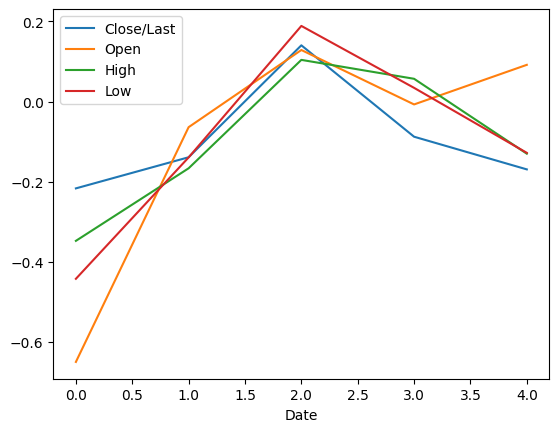

In [17]:
###on regarde en suite la moyenne des varaitions journalières sur toute la durée regroupés par jours de la semaine
variation.groupby(variation.index).mean().plot()